In [1]:
#importing libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset

jobs_df = pd.read_csv('/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv')
jobs_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [3]:
#dropping unnecessary columns
df = jobs_df.drop(['Unnamed: 0', 'index'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                61953 non-null  object 
 1   company_name         61953 non-null  object 
 2   location             61916 non-null  object 
 3   via                  61944 non-null  object 
 4   description          61953 non-null  object 
 5   extensions           61953 non-null  object 
 6   job_id               61953 non-null  object 
 7   thumbnail            38194 non-null  object 
 8   posted_at            61763 non-null  object 
 9   schedule_type        61707 non-null  object 
 10  work_from_home       27980 non-null  object 
 11  salary               10088 non-null  object 
 12  search_term          61953 non-null  object 
 13  date_time            61953 non-null  object 
 14  search_location      61953 non-null  object 
 15  commute_time         0 non-null     

In [4]:
#Let's look closer to job_id. Is there only unique job offers?
df['job_id'].nunique() / df['job_id'].count()

0.9487030490855971

So there is 94.87% unique job offers. I decided to work with unique job offers only.

In [5]:
#I want to remove all dupplicated offers up until the newest offer. For that we need to convert column 'posted_at' to some mesurable feature in order to be able to sort values.
def to_timedelta_conv(c):
    if pd.isna(c):
        return pd.Timedelta(0, 'seconds')
    number, unit, agos = c.split()
    if 'hour' in unit:
        return pd.Timedelta(int(number), 'hour')
    elif 'minute' in unit:
        return pd.Timedelta(int(number), 'minute')
    elif 'second' in unit:
        return pd.Timedelta(int(number), 'second')
    elif 'day' in unit:
        return pd.Timedelta(int(number), 'day')

df['posted_timedelta'] = df['posted_at'].apply(to_timedelta_conv)
df.sort_values('posted_timedelta', inplace=True)


The only downfall is that for Nan values in 'posted_at' column we got 0 days. In this way these records with 0 days will be treated as the newest at the point of deleting duplicates. I decided to leave it like that and not delete them.

In [6]:
#Removing duplicates
df_job_d = df.drop_duplicates(subset='job_id', keep='first')
df_job_d

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,...,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,posted_timedelta
6091,Data Analyst,City of Grand Junction,"Grand Junction, CO",GovernmentJobs.com,"DATA ANALYST\nHiring Range: $6,390 - $7,191 Mo...","['6,390.80–7,191.60 a month', 'Full-time', 'Pa...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,NaN,Full-time,...,6390.80–7191.60,a month,6791.2,6390.8,7191.6,NaN,NaN,81494.4,[],0 days
6081,Senior Data Analyst,"VIZIO, Inc.","Denver, CO",Vizio,About the Team\n\nThe VIZIO Unified Data Team ...,"['Full-time', 'No degree mentioned', 'Dental i...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,NaN,NaN,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql'],0 days
5200,Data Analyst,City of Grand Junction,"Grand Junction, CO",GovernmentJobs.com,"DATA ANALYST\nHiring Range: $6,390 - $7,191 Mo...","['6,390.80–7,191.60 a month', 'Full-time', 'De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,NaN,Full-time,...,6390.80–7191.60,a month,6791.2,6390.8,7191.6,NaN,NaN,81494.4,[],0 days
30528,Data Analyst,State of Colorado,"Pueblo, CO",GovernmentJobs.com,It is the mission of the Office of Institution...,"['58K–62K a year', 'Full-time', 'Dental insura...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,https://serpapi.com/searches/67b405c7e9cf07267...,NaN,Full-time,...,58K–62K,a year,60000.0,58000.0,62000.0,NaN,60000.0,60000.0,"['power_bi', 'tableau', 'sas', 'sql', 'spss', ...",0 days
30529,Data Analyst,State of Colorado,"Pueblo, CO",GovernmentJobs.com,It is the mission of the Office of Institution...,"['58K–62K a year', 'Full-time', 'Health insura...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,https://serpapi.com/searches/67b162cae8dd35fb3...,NaN,Full-time,...,58K–62K,a year,60000.0,58000.0,62000.0,NaN,60000.0,60000.0,"['power_bi', 'tableau', 'sas', 'sql', 'spss', ...",0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27197,Public Health Data Analyst,Conduent Healthy Communities Corporation,United States,Conduent,"Through our dedicated associates, Conduent del...","['19 days ago', 'Full-time', 'Paid time off', ...",eyJqb2JfdGl0bGUiOiJQdWJsaWMgSGVhbHRoIERhdGEgQW...,https://serpapi.com/searches/6778b24747935088e...,19 days ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel', 'sas', 'r']",19 days
27194,Data Analyst,Everlight Solar,"Colorado Springs, CO",Built In,Everlight Solar is seeking a skilled Data Anal...,"['19 days ago', '65K–100K a year', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,19 days ago,Full-time,...,65K–100K,a year,82500.0,65000.0,100000.0,NaN,82500.0,82500.0,['sql'],19 days
1300,Data Analyst,"Larimer County, CO","Fort Collins, CO",Careers In Government,"Overview\n\nOne Agency, One Mission: Public Sa...","['20 days ago', 'Full-time', 'Paid time off', ...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,20 days ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],20 days
29338,Data Analyst,Epiroc Careers,"Broomfield, CO",Careers At Epiroc,United in Performance. Inspired by Innovation....,"['26 days ago', 'Full-time', 'Health insurance...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,26 days ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'power_bi', 'sql', 'r', 'python']",26 days


> Let's find the most frequently asked skills.

In [7]:
#Observing the tokens
df_job_d['description_tokens'].value_counts()

description_tokens
[]                                                                                                  12817
['excel']                                                                                            2099
['sql']                                                                                              1965
['excel', 'sql']                                                                                      980
['go']                                                                                                383
                                                                                                    ...  
['power_bi', 'excel', 'sap', 'outlook', 'snowflake', 'power_bi', 'word', 'visio']                       1
['hadoop', 'tableau', 'power_bi', 'r', 'python', 'scala', 'spark', 'sas', 'sap', 'sql', 'azure']        1
['excel', 'javascript', 'html', 'css']                                                                  1
['excel', 'power_bi', 'tabl

We need to flatten the *description_token* column to be able to count skills.

I want to use pandas explode() function but we need to make sure that *description_tokens* column is an iterable object

In [8]:
#Value Type
df_job_d['description_tokens'].apply(type)

6091     <class 'str'>
6081     <class 'str'>
5200     <class 'str'>
30528    <class 'str'>
30529    <class 'str'>
             ...      
27197    <class 'str'>
27194    <class 'str'>
1300     <class 'str'>
29338    <class 'str'>
29284    <class 'str'>
Name: description_tokens, Length: 58775, dtype: object

In [9]:
#flattening the column
from ast import literal_eval
skills_sr = df_job_d['description_tokens'].apply(literal_eval).explode()
skills_sr.dropna(inplace=True)
skills_sr.value_counts(normalize=True).head(25)

description_tokens
sql            0.153453
excel          0.098056
python         0.093513
power_bi       0.086106
tableau        0.082665
r              0.056136
sas            0.026093
powerpoint     0.022132
word           0.021377
azure          0.019562
aws            0.018392
snowflake      0.018093
spark          0.015911
looker         0.013382
go             0.011510
sap            0.011037
spreadsheet    0.011032
scala          0.010822
jira           0.009128
spss           0.008955
java           0.008346
c              0.008315
alteryx        0.007906
hadoop         0.007449
outlook        0.007239
Name: proportion, dtype: float64

Here we can observe top 25 most frequently asked skills with respective percentages for Data Analyst. As expected top 5 are: SQL, Excel, Python and Data Visualization Tools (Power BI and Tableau) - the most essential skills for Data Analyst.

In [10]:
#Lets take some to plot them
top_skills = skills_sr.value_counts().nlargest(20)
top_skills

description_tokens
sql            29252
excel          18692
python         17826
power_bi       16414
tableau        15758
r              10701
sas             4974
powerpoint      4219
word            4075
azure           3729
aws             3506
snowflake       3449
spark           3033
looker          2551
go              2194
sap             2104
spreadsheet     2103
scala           2063
jira            1740
spss            1707
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Skills')

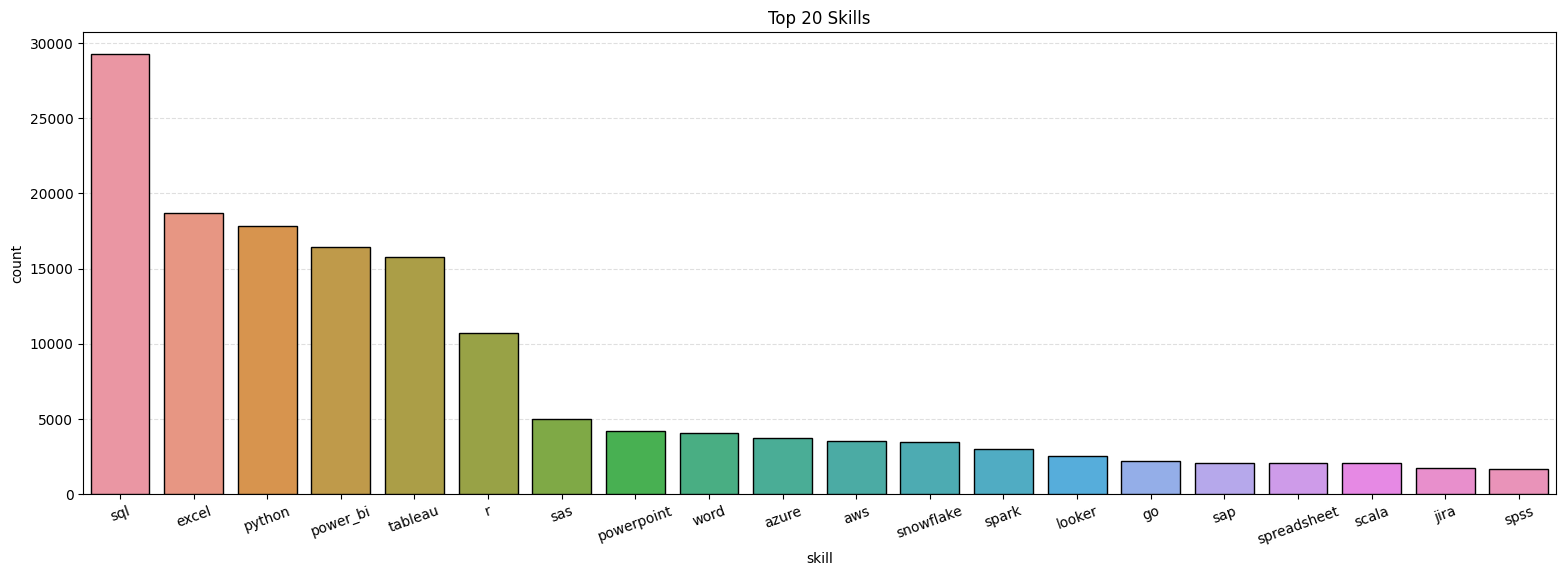

In [11]:
skills_df = top_skills.reset_index()
skills_df.columns = ['skill', 'count']

plt.figure(figsize=(19,6))
sns.barplot(data=skills_df, x='skill', y='count', edgecolor='black', zorder=3)
plt.grid(axis='y', ls='--', alpha=0.4)
plt.xticks(rotation=20)
plt.title('Top 20 Skills')

> Now let's find the most popular job offer's benefits.

In [12]:
#Flattening 'extensions' column
benefits = df_job_d['extensions'].apply(literal_eval).explode().value_counts()

#List of important job offer's benefits
important_benefits = ['Full-time', 'Work from home', 'Health insurance', 'Dental insurance', 'Paid time off', 'Contractor', 'Part-time', 'Internship', 'Temp work']

#Calculating absolute and relative value of benefits
benefits_count = benefits.loc[benefits.index.isin(important_benefits)]
relative = benefits_count.apply(lambda x: (x / benefits.sum()) * 100)

#Making a simple dataframe
ben_df = pd.DataFrame({'count' : benefits_count, 'relative_%' :  relative})
ben_df

,count,relative_%
extensions,,
Full-time,42317,19.494364
Work from home,26379,12.152133
Health insurance,19713,9.081277
Dental insurance,12913,5.948690
Paid time off,12834,5.912297
Contractor,9172,4.225307
Part-time,937,0.431652
Internship,484,0.222966
Temp work,169,0.077854


Out of all companies that have noted about benefits almost 20% of postings indicating that they are looking for full-time employee,about 5% - part-time/conctract option. Vast majority of postings didn't have any extension about it, so I assume it could be discussed with every candidate.

In [13]:
benefits.head(25)

extensions
Full-time                   42317
Work from home              26379
Health insurance            19713
No degree mentioned         18287
Dental insurance            12913
Paid time off               12834
Contractor                   9172
18 hours ago                 4066
17 hours ago                 3987
12 hours ago                 3876
11 hours ago                 3685
13 hours ago                 3430
Contractor and Temp work     3126
14 hours ago                 2936
15 hours ago                 2899
10 hours ago                 2801
19 hours ago                 2786
20 hours ago                 2671
16 hours ago                 2535
7 hours ago                  2473
9 hours ago                  2452
21 hours ago                 2406
23 hours ago                 2344
8 hours ago                  2298
22 hours ago                 2289
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Full-time'),
  Text(1, 0, 'Work from home'),
  Text(2, 0, 'Health insurance'),
  Text(3, 0, 'Dental insurance'),
  Text(4, 0, 'Paid time off'),
  Text(5, 0, 'Contractor'),
  Text(6, 0, 'Part-time'),
  Text(7, 0, 'Internship'),
  Text(8, 0, 'Temp work')])

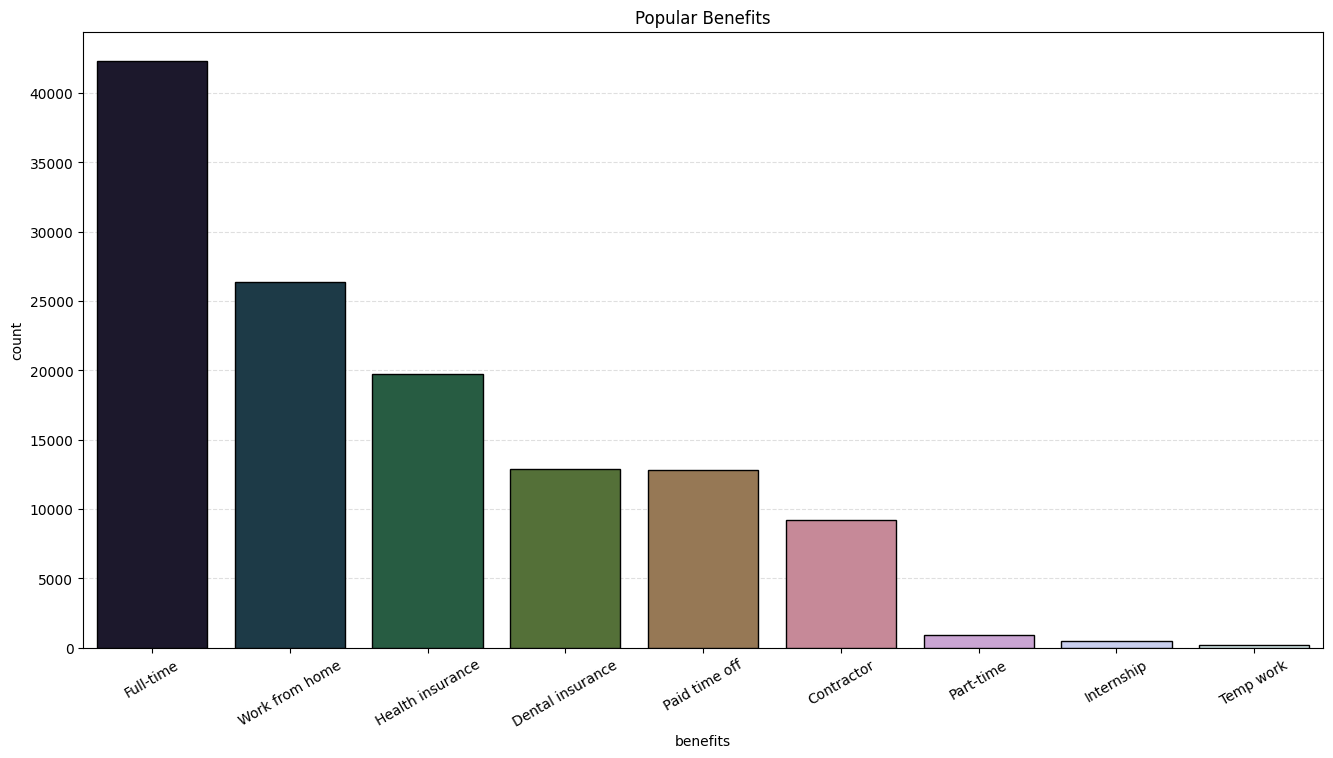

In [14]:
plt.figure(figsize=(16,8))

sns.barplot(data=ben_df, x=ben_df.index, y='count', palette='cubehelix', edgecolor='black', zorder=3)
plt.title('Popular Benefits')
plt.grid(axis='y', ls='--', alpha=0.4)
plt.xlabel('benefits')
plt.xticks(rotation=30)

> Which companies are the most active in hiring data analysts?

In [15]:
companies = df_job_d['company_name'].value_counts()
companies.head(10)

company_name
Upwork                 7526
Talentify.io           2113
Walmart                1800
Dice                    862
EDWARD JONES            747
Corporate               610
Cox Communications      538
Insight Global          476
iSay                    341
Centene Corporation     242
Name: count, dtype: int64

Upwork being by far the most active in hiring data analyst in US, with Talentify.io and Walmart closing the big 3.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Upwork'),
  Text(1, 0, 'Talentify.io'),
  Text(2, 0, 'Walmart'),
  Text(3, 0, 'Dice'),
  Text(4, 0, 'EDWARD JONES'),
  Text(5, 0, 'Corporate'),
  Text(6, 0, 'Cox Communications'),
  Text(7, 0, 'Insight Global'),
  Text(8, 0, 'iSay'),
  Text(9, 0, 'Centene Corporation'),
  Text(10, 0, 'vmysmartpros'),
  Text(11, 0, 'Harnham'),
  Text(12, 0, 'Staffigo Technical Services, LLC'),
  Text(13, 0, 'Apex Systems'),
  Text(14, 0, 'Leidos'),
  Text(15, 0, 'Saint Louis County Clerks Office'),
  Text(16, 0, "Sam's Club"),
  Text(17, 0, 'CareerBuilder'),
  Text(18, 0, 'General Dynamics Information Technology'),
  Text(19, 0, 'State of Missouri')])

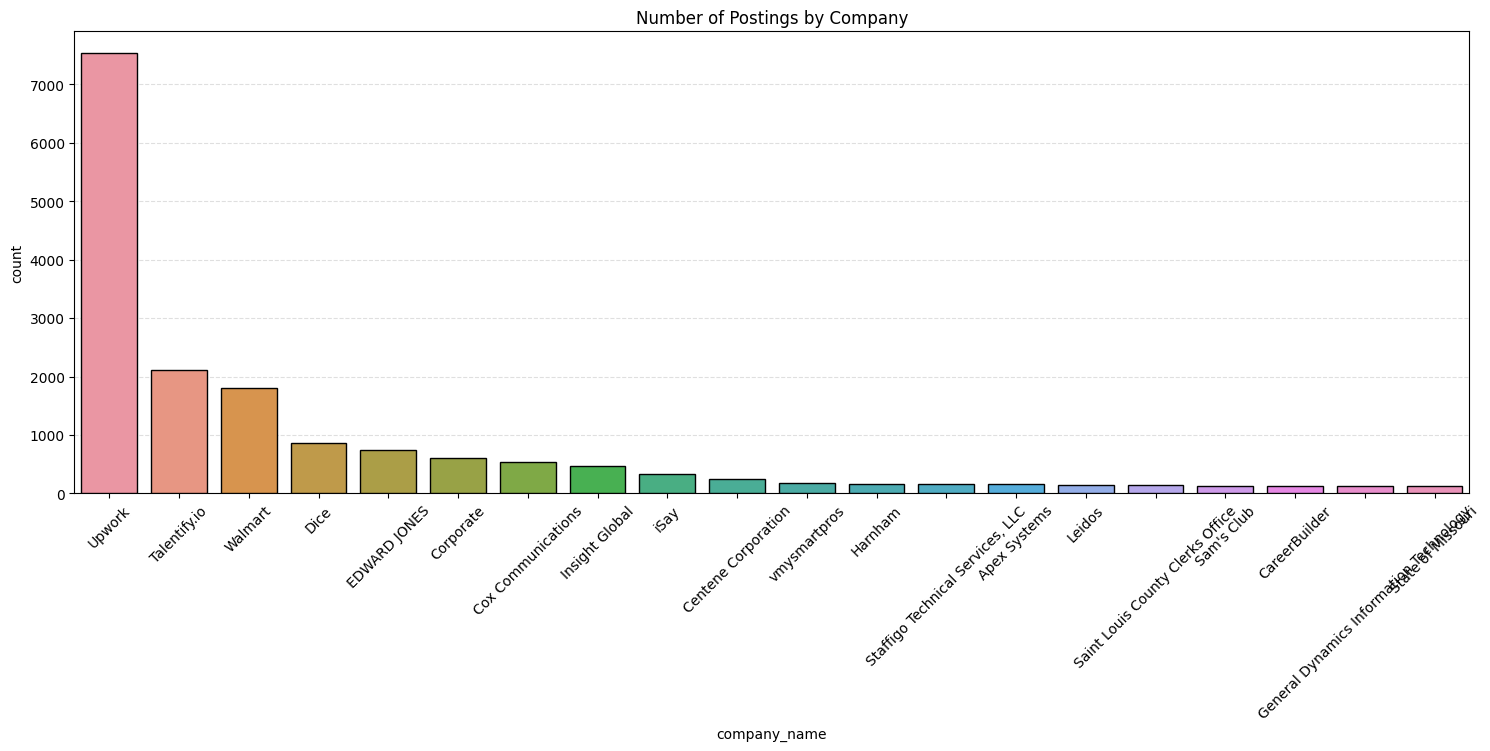

In [16]:
comp_df = companies.head(20).reset_index()
comp_df

plt.figure(figsize=(18,6))
sns.barplot(data=comp_df, x='company_name', y='count', edgecolor='black', zorder=3)
plt.grid(axis='y', ls='--', alpha=0.4)
plt.title('Number of Postings by Company')
plt.xticks(rotation=45)

> Which sources are used the most?

In [17]:
sources = df_job_d['via'].value_counts()
sources.index = sources.index.str.replace('via ', '')
sources.head(20)

via
LinkedIn             20441
Upwork                7258
BeBee                 5378
Trabajo.org           3017
ZipRecruiter          2867
BeBee                 2661
Indeed                1845
LinkedIn              1502
Snagajob               970
Jobs Trabajo.org       810
Adzuna                 757
Built In               614
Jora                   410
Ai-Jobs.net            350
Monster                338
My ArkLaMiss Jobs      283
SimplyHired            251
Upwork                 241
Nexxt                  221
Recruit.net            210
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'LinkedIn'),
  Text(1, 0, 'Upwork'),
  Text(2, 0, 'BeBee'),
  Text(3, 0, 'Trabajo.org'),
  Text(4, 0, 'ZipRecruiter'),
  Text(5, 0, 'Indeed'),
  Text(6, 0, 'Snagajob'),
  Text(7, 0, 'Jobs Trabajo.org'),
  Text(8, 0, 'Adzuna'),
  Text(9, 0, 'Built In'),
  Text(10, 0, 'Jora'),
  Text(11, 0, 'Ai-Jobs.net'),
  Text(12, 0, 'Monster'),
  Text(13, 0, 'My ArkLaMiss Jobs'),
  Text(14, 0, 'SimplyHired'),
  Text(15, 0, 'Nexxt'),
  Text(16, 0, 'Recruit.net')])

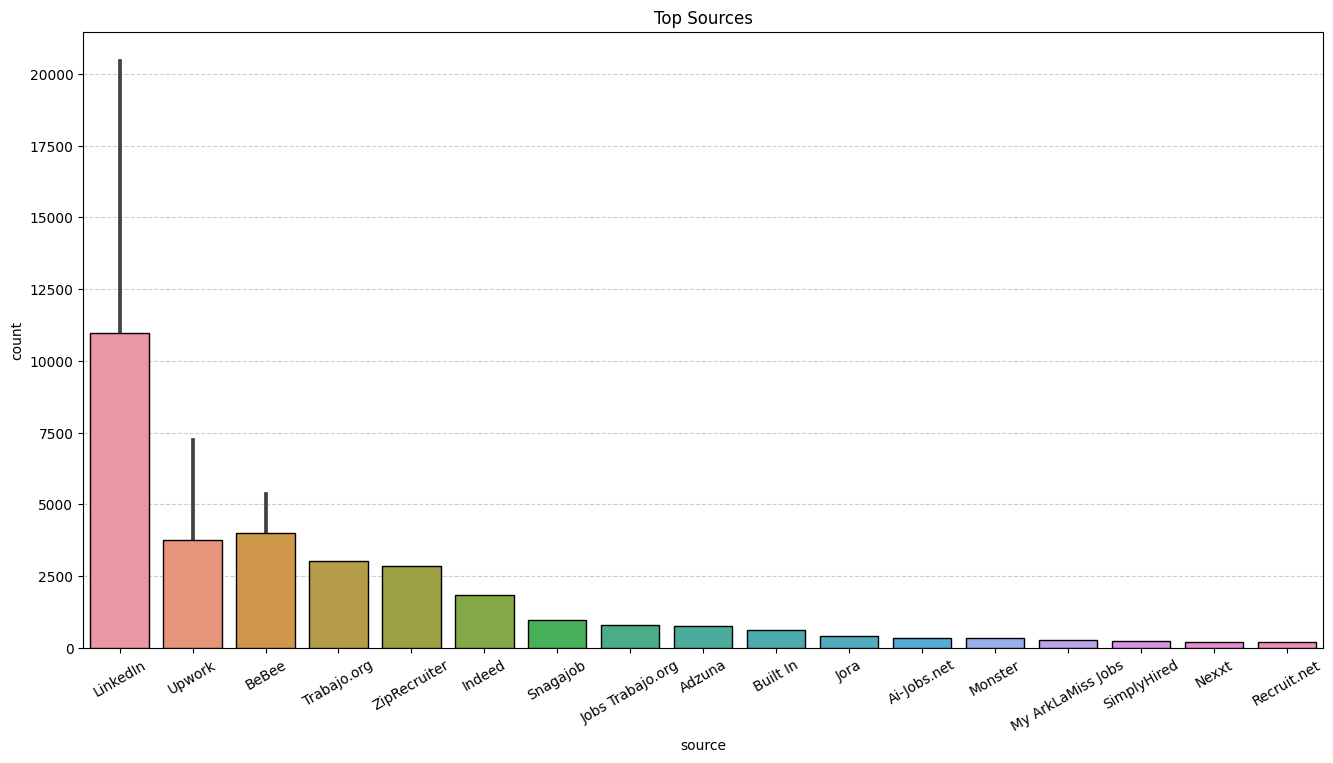

In [18]:
src_df = sources.head(20).reset_index()
src_df.columns = ['source', 'count']

plt.figure(figsize=(16,8))
sns.barplot(data=src_df, x='source', y='count', zorder=3, edgecolor='black')
plt.grid(axis='y', ls='--', alpha=0.6)
plt.title('Top Sources')
plt.xticks(rotation=30)

LinkedIn proving to be the most common place to post a vacancy for a Data Analyst, closing the most popular platforms are Upwork, BeBee, Trabajo.org, ZipRecruiter and Indeed.

> What are the most frequently occured locations?

In [19]:
#Listing all the locations
locs = df_job_d['location'].value_counts()

#Function for extracting state part from location
def extract_state(location):
    if isinstance(location, str):
        loc_parts = location.split(',')
        if len(loc_parts) > 1:
            return loc_parts[-1].strip()
        else:
            return None


loc_state = df_job_d['location'].apply(extract_state)
loc_state.value_counts().head(30)

location
MO                4739
OK                3078
CO                2943
KS                2778
AR                2677
NM                 207
CA                 132
WY                  86
TX                  75
NE                  30
NY                  24
MA                  23
PA                  10
Colorado             9
UT                   8
NJ                   7
VA                   7
AZ                   5
CO (+1 other)        5
MD                   3
DC                   3
CO (+2 others)       2
WV                   1
CA (+7 others)       1
UT (+2 others)       1
CA (+6 others)       1
DE                   1
NH                   1
KS  (+1 other)       1
NC                   1
Name: count, dtype: int64

As we can see not all values in the location column represented in the same desired format, but anyways we got the most of them right and can draw some conclusions.

> What about salaries?

In [20]:
df_job_d['salary_standardized'].notna().sum()/df_job_d['job_id'].count()

0.16483198638877072

Out of all unique job postings only 16% were provided with salary range.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'salary_standardized distribution')

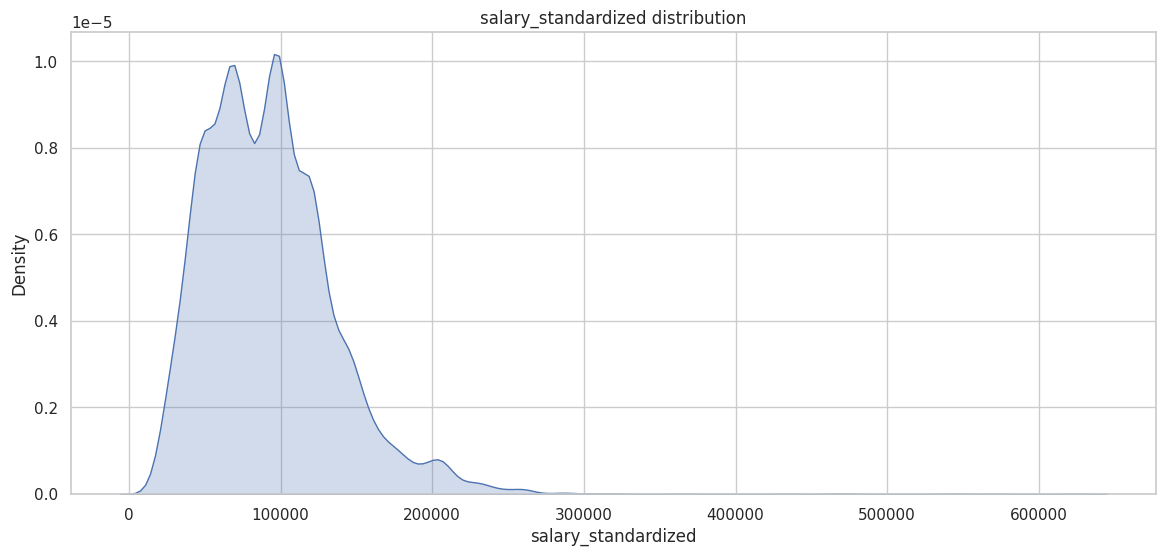

In [21]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(14,6))

sns.kdeplot(data=df_job_d, x='salary_standardized', fill=True)
plt.title('salary_standardized distribution')

In [22]:
df_job_d['salary_standardized'].describe()

count      9688.000000
mean      92420.133491
std       43461.892629
min       15080.000000
25%       62400.000000
50%       88795.200000
75%      117520.000000
max      624000.000000
Name: salary_standardized, dtype: float64

Distribution is heavily skewed to the right with some very big values. Because of such extreme values standard deviation is pretty big.

((array([-4.22791845, -4.02386034, -3.91267396, ...,  3.91267396,
          4.02386034,  4.22791845]),
  array([15080., 18720., 18720., ...,    nan,    nan,    nan])),
 (nan, nan, nan))

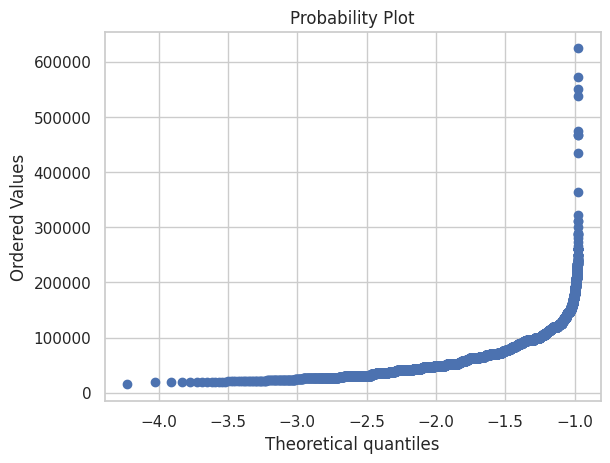

In [23]:
#Q-Q plot for checking the normality
from scipy import stats
stats.probplot(x=df_job_d['salary_standardized'], dist='norm', plot=plt)

I have checked different types of distributions and it is definitely not normal, it could be exponential or lognormal distribution but extremely big values do not align well and it is hard to tell what is the type of distribution. Values distributed not evengly at both tails, especially right tail.

> What companies pay the most?

In [24]:
df_comp = df_job_d[df_job_d['salary_standardized'].notna()]

slr_comp = df_comp.groupby(by='company_name')['salary_standardized'].agg(['mean','count','std']).sort_values(by='count', ascending=False).head(40)
slr_comp[['mean','std']] = slr_comp[['mean', 'std']].round(0)
slr_comp.sort_values(by='mean', ascending=False, inplace=True)
slr_comp

,mean,count,std
company_name,,,
Meta,179294.0,21,41530.0
Mindlance,135790.0,16,39149.0
LeadStack Inc.,134542.0,28,27173.0
Harnham,132417.0,71,21202.0
GradBay,130875.0,20,42820.0
Applicantz,125617.0,27,24049.0
Motion Recruitment,125282.0,19,29956.0
Edward Jones,119349.0,20,18709.0
Akkodis,116364.0,15,31113.0


<Axes: xlabel='mean', ylabel='company_name'>

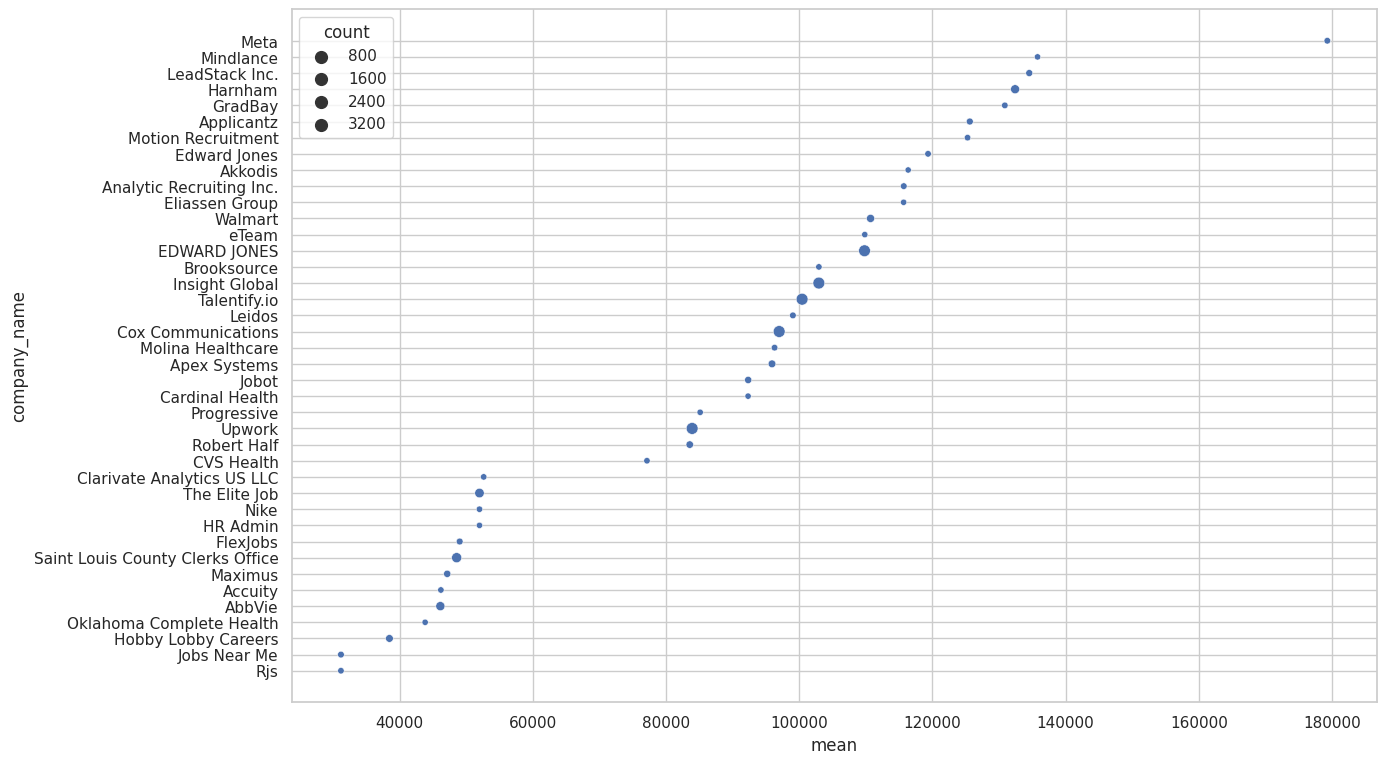

In [25]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=slr_comp, x='mean', y=slr_comp.index, size='count', size_norm=(10, 150))

These are 40 companies, filtered by number of job postings made and their respective average salary for a Data Analyst position. It is important to consider number of postings, some of the companies  made hundreds and even couple of thousands of them, vast majority of companies made under a 100 postings throughout the time.
* Meta is leading the way with the highest proposed salary, but with relatively small number of postings
* Around the mean (92k) we can observe where the majority of proposed salaries locates (82k - 115k).
* There is a big claster of companies located separately in a lower part of range (35k - 55k)
Important to consider that it is only a first look, to be able to draw valid conclusion about salaries in different companies, we need additional information about branches, field of work etc.